In [1]:
pip install pyspark

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pyspark import SparkContext
# This line is creating a new SparkContext object named sc. The SparkContext is being created in local mode (i.e., it will run on the local machine) and is given the name "PySparkIntro".
sc = SparkContext("local", "PySparkIntro")


24/08/26 18:55:25 WARN Utils: Your hostname, Buffs-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.1.3 instead (on interface en0)
24/08/26 18:55:25 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/08/26 18:55:26 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/08/26 18:55:26 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [3]:
# This line is importing the SparkSession class from the PySpark SQL library. The SparkSession is the entry point to any Spark SQL functionality.
from pyspark.sql import SparkSession

In [4]:
# This line is creating a new SparkSession object named spark. The SparkSession is being created with the name "PySparkIntro". If a SparkSession with this name already exists, it will be reused; otherwise, a new one will be created.
spark = SparkSession.builder.appName("PySparkIntro").getOrCreate()
print(type(spark))
print(type(spark.createDataFrame))


<class 'pyspark.sql.session.SparkSession'>
<class 'method'>


In [5]:
# This line is creating a new list named data containing the numbers 1 through 5.
data = [1,2,3,4,5]
# This line is creating a new Resilient Distributed Dataset (RDD) named rdd from the data list. The parallelize method is used to create an RDD from a Python list.
rdd = sc.parallelize(data)


In [6]:
# This line is applying a transformation to the rdd RDD using the map method. The map method applies a lambda function to each element in the RDD, squaring each number.
square_rdd = rdd.map(lambda x: x**2)

In [7]:
# This line is applying a transformation to the rdd RDD using the filter method. The filter method applies a lambda function to each element in the RDD, keeping only the numbers that are even (i.e., numbers that leave a remainder of 0 when divided by 2).
even_rdd = rdd.filter(lambda x: x%2==0)

In [8]:
# This line is collecting the results of the square_rdd RDD into a Python list named collected_data. The collect method is used to bring the data back to the driver node.
collected_data = square_rdd.collect()

In [9]:
num_elements = square_rdd.count()

In [10]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType

In [11]:
schema = StructType([
    StructField("Name", StringType(), True),
    StructField("Age", IntegerType(), True),
    StructField("Salary", IntegerType(), True)
])

In [12]:
data = [("Alice", 28, 45000), ("Bob", 36, 60000), ("Cathy", 23, 35000)]

In [13]:
ds = spark.createDataFrame(data, schema)

In [14]:
ds = ds.alias("employees")

In [15]:
ds.show()

+-----+---+------+
| Name|Age|Salary|
+-----+---+------+
|Alice| 28| 45000|
|  Bob| 36| 60000|
|Cathy| 23| 35000|
+-----+---+------+



In [16]:
# just an example to read data files 
data_file = "path.to.data.csv"
df = spark.read.csv(data_file, header = True, inferSchema = True)


AnalysisException: [PATH_NOT_FOUND] Path does not exist: file:/Users/alexbark/Documents/Pyspark_101/path.to.data.csv.

24/08/26 18:55:36 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


In [ ]:
data = [("Alice", 28, 45000), ("Bob", 36, 60000), ("Cathy", 23, 35000)]
df = spark.createDataFrame(data, ["Name", "Age", "Salary"])
df.show()

In [ ]:
# just an example to read json files 
json_data_file = "path/to/data.json"
df_json = spark.read.json(json_data_file)

In [ ]:
# just an example to read xml files 

xml_data_file = "path/to/data.xml"
df_xml = spark.read.format("xml").option("rowTag", "employee").load(xml_data_file)

In [ ]:
#data cleaning
data_with_missing = [
    ("Alice", 28, 45000),
    ("Bob", None, 60000),
    ("Cathy", 23, None),
]

In [ ]:
df_missing = spark.createDataFrame(data_with_missing, ["Name", "Age", "Salary"])

In [ ]:
mean_age = df_missing.select("Age").agg({"Age":"avg"}).collect()[0][0]

In [ ]:
df_cleaned = df_missing.na.fill(mean_age, subset=["Age"])

In [ ]:
df_cleaned.show()

In [ ]:
pip install numpy

In [ ]:
from pyspark.ml.feature import MinMaxScaler, StandardScaler
from pyspark.ml.feature import VectorAssembler

In [ ]:
df = spark.createDataFrame(data, ["Name", "Age", "Salary"])

In [ ]:
assembler = VectorAssembler(inputCols = ["Age", "Salary"], outputCol = "features")

In [ ]:
data_for_scaling = assembler.transform(df)

In [ ]:
data_for_scaling.show()

In [ ]:
scalar_min_max = MinMaxScaler(inputCol = "features", outputCol="scaled_features")

In [ ]:
scaled_min_max = scalar_min_max.fit(data_for_scaling).transform(data_for_scaling)

In [ ]:
scaled_min_max.show()

In [ ]:
scaler_standardization = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=True)

In [ ]:
scaled_standardization = scaler_standardization.fit(data_for_scaling).transform(data_for_scaling)

In [ ]:
scaled_standardization.show()

In [ ]:
data = [("Alice", 28, 45000), ("Bob", 36, 60000), ("Cathy", 23, 35000)]


In [ ]:
df = spark.createDataFrame(data, ["Name", "Age", "Salary"])

In [ ]:
from pyspark.sql.functions import mean, stddev

In [ ]:
summary_stats = df.describe(["Age","Salary"])

In [ ]:
summary_stats.show()

+-------+--------------+------------------+
|summary|           Age|            Salary|
+-------+--------------+------------------+
|  count|             3|                 3|
|   mean|          29.0|46666.666666666664|
| stddev|6.557438524302|12583.057392117917|
|    min|            23|             35000|
|    max|            36|             60000|
+-------+--------------+------------------+



In [ ]:
pip install matplotlib

In [ ]:
pip install pandas

In [ ]:
pip install setuptools


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
pd_df = df.toPandas()

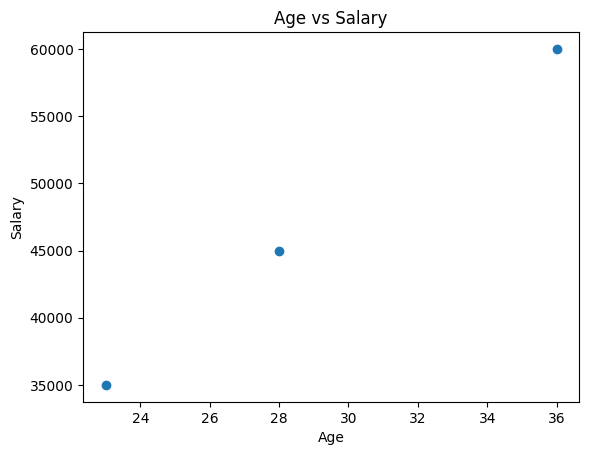

In [ ]:
plt.scatter(pd_df["Age"], pd_df["Salary"])
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age vs Salary")
plt.show()


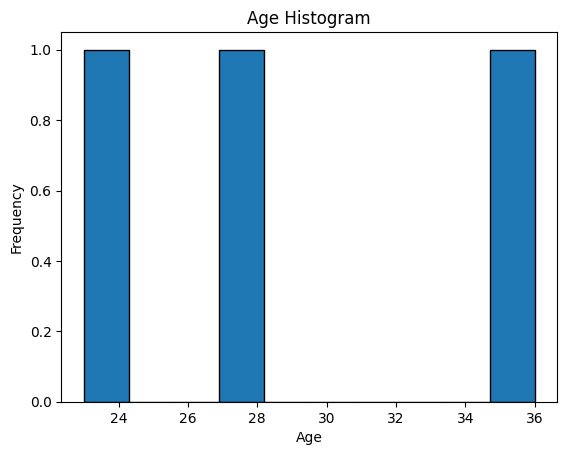

In [ ]:
plt.hist(pd_df["Age"], bins = 10, edgecolor = "black")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Histogram")
plt.show()

In [ ]:
correlation_matrix = df.stat.corr("Age", "Salary")
print("correlation between Age and Salary: ", correlation_matrix)

correlation between Age and Salary:  0.9998469895178863


In [ ]:
from pyspark.sql.functions import col
df_transformed = df.withColumn("Increased_Salary", col("Salary") * 1.1)

In [ ]:
df_transformed.show()

+-----+---+------+-----------------+
| Name|Age|Salary| Increased_Salary|
+-----+---+------+-----------------+
|Alice| 28| 45000|49500.00000000001|
|  Bob| 36| 60000|          66000.0|
|Cathy| 23| 35000|          38500.0|
+-----+---+------+-----------------+



In [ ]:
from pyspark.sql.functions import concat, lit

In [ ]:
df_transformed = df.withColumn("Modified_Name", concat(col("Name"), lit("- Employee")))

In [ ]:
df_transformed.show()

+-----+---+------+---------------+
| Name|Age|Salary|  Modified_Name|
+-----+---+------+---------------+
|Alice| 28| 45000|Alice- Employee|
|  Bob| 36| 60000|  Bob- Employee|
|Cathy| 23| 35000|Cathy- Employee|
+-----+---+------+---------------+



In [ ]:
df_filtered = df.filter(col("Age")>25)

In [ ]:
df_filtered.show()

+-----+---+------+
| Name|Age|Salary|
+-----+---+------+
|Alice| 28| 45000|
|  Bob| 36| 60000|
+-----+---+------+



In [ ]:
from pyspark.sql.functions import avg

In [ ]:
avg_salary = df.agg(avg(col("Salary"))).collect()[0][0]

In [ ]:
print("Average Salary: ", avg_salary)

Average Salary:  46666.666666666664


In [ ]:
# grouping and aggregation data 
from pyspark.sql.functions import avg, max

In [ ]:
grouped_data = df.groupBy("Age").agg(avg("Salary"), max("Salary"))

In [ ]:
grouped_data.show()

+---+-----------+-----------+
|Age|avg(Salary)|max(Salary)|
+---+-----------+-----------+
| 28|    45000.0|      45000|
| 36|    60000.0|      60000|
| 23|    35000.0|      35000|
+---+-----------+-----------+



In [ ]:

from pyspark.sql.window import Window
from pyspark.sql.functions import sum

In [ ]:
window_spec = Window.orderBy("Age")

In [ ]:
df_with_cumsum = df.withColumn("CumulativeSalary", sum("Salary").over(window_spec))

In [ ]:
df_with_cumsum.show()

24/08/26 18:21:34 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/08/26 18:21:34 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/08/26 18:21:34 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+-----+---+------+----------------+
| Name|Age|Salary|CumulativeSalary|
+-----+---+------+----------------+
|Cathy| 23| 35000|           35000|
|Alice| 28| 45000|           80000|
|  Bob| 36| 60000|          140000|
+-----+---+------+----------------+



24/08/26 18:21:35 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/08/26 18:21:35 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


In [ ]:
def add_prefix(name):
    return "Mr." + name

In [ ]:
from pyspark.sql.functions import udf

In [ ]:
from pyspark.sql.types import StringType

In [ ]:
add_prefix_udf = udf(add_prefix, StringType())

In [ ]:
df_with_prefix = df.withColumn("PrefixedName", add_prefix_udf("Name"))

In [ ]:
df_with_prefix.show()

+-----+---+------+------------+
| Name|Age|Salary|PrefixedName|
+-----+---+------+------------+
|Alice| 28| 45000|    Mr.Alice|
|  Bob| 36| 60000|      Mr.Bob|
|Cathy| 23| 35000|    Mr.Cathy|
+-----+---+------+------------+



In [ ]:
def calculate_total_income(age, salary):
    return age * salary

In [ ]:
from pyspark.sql.types import IntegerType

In [ ]:
calculate_total_income_udf = udf(calculate_total_income, IntegerType())

In [ ]:
df_with_total_income = df.withColumn("Total Income (doesn't have a meaning)", calculate_total_income_udf("Age", "Salary"))

In [ ]:
df_with_total_income.show()

+-----+---+------+-------------------------------------+
| Name|Age|Salary|Total Income (doesn't have a meaning)|
+-----+---+------+-------------------------------------+
|Alice| 28| 45000|                              1260000|
|  Bob| 36| 60000|                              2160000|
|Cathy| 23| 35000|                               805000|
+-----+---+------+-------------------------------------+



In [ ]:
# machine learning with pyspark
spark = SparkSession.builder.appName("SupervisedLearning").getOrCreate()

24/08/26 18:28:41 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [ ]:
data = [
    (1200, 2, 1, 150000),
    (1400, 3, 2, 200000),
    (1600, 4, 2, 250000),
    (1800, 5, 3, 300000),
    (2000, 6, 4, 350000),
    (2200, 7, 5, 400000),
    (2400, 8, 6, 450000),
    (2600, 9, 7, 500000),
    (2800, 10, 8, 550000),
]

In [ ]:
from pyspark.sql.types import FloatType

In [ ]:
schema = StructType([
    StructField("Sqft", IntegerType(), True),
    StructField("Bedrooms", IntegerType(), True),
    StructField("Bathroom", IntegerType(), True),
    StructField("Price", IntegerType(), True)
])

In [ ]:
df = spark.createDataFrame(data, schema)

In [ ]:
df.show()

+----+--------+--------+------+
|Sqft|Bedrooms|Bathroom| Price|
+----+--------+--------+------+
|1200|       2|       1|150000|
|1400|       3|       2|200000|
|1600|       4|       2|250000|
|1800|       5|       3|300000|
|2000|       6|       4|350000|
|2200|       7|       5|400000|
|2400|       8|       6|450000|
|2600|       9|       7|500000|
|2800|      10|       8|550000|
+----+--------+--------+------+



In [ ]:
# # classification with pyspark
# logistic regression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline


In [ ]:
feature_columns = ["Sqft", "Bedrooms", "Bathroom"]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

In [ ]:
df_assembled = assembler.transform(df)

In [ ]:
train_data, test_data = df_assembled.randomSplit([0.8, 0.2])

In [ ]:
lr = LogisticRegression(featuresCol="features", labelCol="Price")
model = lr.fit(train_data)

24/08/26 18:37:29 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/08/26 18:37:29 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS


In [ ]:
predictions = model.transform(test_data)
predictions.select("features", "Price", "prediction").show()

24/08/26 18:38:31 WARN DAGScheduler: Broadcasting large task binary with size 16.9 MiB


+----------------+------+----------+
|        features| Price|prediction|
+----------------+------+----------+
|[1600.0,4.0,2.0]|250000|  200000.0|
|[2000.0,6.0,4.0]|350000|  400000.0|
+----------------+------+----------+



In [ ]:
from pyspark.ml.regression import LinearRegression


In [ ]:
lr = LinearRegression(featuresCol="features", labelCol="Price")
model = lr.fit(train_data)

24/08/26 18:40:20 WARN Instrumentation: [7d726317] regParam is zero, which might cause numerical instability and overfitting.
24/08/26 18:40:21 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK
24/08/26 18:40:21 WARN Instrumentation: [7d726317] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.
24/08/26 18:40:21 ERROR LBFGS: Failure! Resetting history: breeze.optimize.FirstOrderException: Line search failed


In [ ]:
predictions = model.transform(test_data)

In [ ]:
predictions.select("features", "Price", "prediction").show()

+----------------+------+------------------+
|        features| Price|        prediction|
+----------------+------+------------------+
|[1600.0,4.0,2.0]|250000|249999.99999999878|
|[2000.0,6.0,4.0]|350000| 349999.9999999993|
+----------------+------+------------------+



In [ ]:
# 1 0 <- use LogisticRegression
# 123142 <- use LinearRegression

In [ ]:
data = [
    ("Customer", 10000, 5000, 2000),
    ("Customer", 20000, 7000, 3000),
    ("Customer", 30000, 9000, 4000),
    ("Customer", 40000, 11000, 5000),
    ("Customer", 50000, 13000, 6000),
    ("Customer", 60000, 15000, 7000),
    ("Customer", 70000, 17000, 8000),
    ("Customer", 80000, 19000, 9000),
    ("Customer", 90000, 21000, 10000),
    ("Customer", 100000, 23000, 11000),
]

In [ ]:
schema = StructType([
    StructField("CustomerID", StringType(), True),
    StructField("SpendingElectronics", IntegerType(), True),
    StructField("SpendingFashion", IntegerType(), True),
    StructField("SpendingGrocery", IntegerType(), True)
])

In [ ]:
df = spark.createDataFrame(data, schema)

In [ ]:
df.show()


+----------+-------------------+---------------+---------------+
|CustomerID|SpendingElectronics|SpendingFashion|SpendingGrocery|
+----------+-------------------+---------------+---------------+
|  Customer|              10000|           5000|           2000|
|  Customer|              20000|           7000|           3000|
|  Customer|              30000|           9000|           4000|
|  Customer|              40000|          11000|           5000|
|  Customer|              50000|          13000|           6000|
|  Customer|              60000|          15000|           7000|
|  Customer|              70000|          17000|           8000|
|  Customer|              80000|          19000|           9000|
|  Customer|              90000|          21000|          10000|
|  Customer|             100000|          23000|          11000|
+----------+-------------------+---------------+---------------+



In [ ]:
from pyspark.ml.clustering import KMeans

In [ ]:
feature_columns = ["SpendingElectronics", "SpendingFashion", "SpendingGrocery"]

In [ ]:
assembler = VectorAssembler(inputCols = feature_columns, outputCol= "features")

In [ ]:
df_assembler = assembler.transform(df)

In [ ]:
kmeans = KMeans(featuresCol="features", k = 3)

In [ ]:
model = kmeans.fit(df_assembler)

In [ ]:
predictions = model.transform(df_assembler)

In [ ]:
predictions.select("CustomerID", "features", "prediction").show()

+----------+--------------------+----------+
|CustomerID|            features|prediction|
+----------+--------------------+----------+
|  Customer|[10000.0,5000.0,2...|         0|
|  Customer|[20000.0,7000.0,3...|         0|
|  Customer|[30000.0,9000.0,4...|         0|
|  Customer|[40000.0,11000.0,...|         0|
|  Customer|[50000.0,13000.0,...|         1|
|  Customer|[60000.0,15000.0,...|         1|
|  Customer|[70000.0,17000.0,...|         1|
|  Customer|[80000.0,19000.0,...|         1|
|  Customer|[90000.0,21000.0,...|         2|
|  Customer|[100000.0,23000.0...|         2|
+----------+--------------------+----------+



In [ ]:
from pyspark.ml.feature import PCA


In [ ]:
pca = PCA(k=2, inputCol="features", outputCol="pca_features")

In [ ]:
model = pca.fit(df_assembler)

In [ ]:
df_pca = model.transform(df_assembler)

In [ ]:
df_pca.select("CustomerID", "pca_features").show(truncate=False)

+----------+-----------------------------------------+
|CustomerID|pca_features                             |
+----------+-----------------------------------------+
|Customer  |[-10930.080817023569,-3055.0504633038913]|
|Customer  |[-21177.031582983167,-3055.050463303892] |
|Customer  |[-31423.98234894276,-3055.0504633038913] |
|Customer  |[-41670.93311490236,-3055.050463303892]  |
|Customer  |[-51917.88388086196,-3055.0504633038913] |
|Customer  |[-62164.83464682155,-3055.050463303891]  |
|Customer  |[-72411.78541278114,-3055.0504633038904] |
|Customer  |[-82658.73617874074,-3055.050463303892]  |
|Customer  |[-92905.68694470033,-3055.050463303891]  |
|Customer  |[-103152.63771065994,-3055.050463303891] |
+----------+-----------------------------------------+

